In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (1,994 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like

In [ ]:
%cd /content/drive/MyDrive/CS231_Project/

/content/drive/MyDrive/CS231_Project


In [ ]:
import cv2
import os
import numpy as np
import glob
import pytesseract
from google.colab.patches import cv2_imshow

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

# Train SVM

In [ ]:
digit_w = 30
digit_h = 60

def get_digit_data(path):#:, digit_list, label_list):

    digit_list = []
    label_list = []

    for number in range(10):
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    for number in range(65, 91):
        #number = chr(number)
        print(number)
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    return  digit_list, label_list

In [ ]:
#lấy dữ liệu
digit_path = "data/train/"
digit_list, label_list = get_digit_data(digit_path)

digit_list = np.array(digit_list, dtype=np.float32)
digit_list = digit_list.reshape(-1, digit_h * digit_w)

label_list = np.array(label_list)
label_list = label_list.reshape(-1, 1)

svm_model = cv2.ml.SVM_create()
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.setKernel(cv2.ml.SVM_INTER)
svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm_model.trainAuto(digit_list, cv2.ml.ROW_SAMPLE, label_list)

svm_model.save("svm.xml")

data/train/0/9221.jpg
(1, 1800)
data/train/0/7075.jpg
(1, 1800)
data/train/0/4.jpg
(1, 1800)
data/train/0/1163.jpg
(1, 1800)
data/train/0/47015_5.jpg
(1, 1800)
data/train/0/46581_5.jpg
(1, 1800)
data/train/0/46817_2.jpg
(1, 1800)
data/train/0/46639_7.jpg
(1, 1800)
data/train/0/46914_4.jpg
(1, 1800)
data/train/0/46304_5.jpg
(1, 1800)
data/train/0/46713_4.jpg
(1, 1800)
data/train/0/46581_8.jpg
(1, 1800)
data/train/0/46553_5.jpg
(1, 1800)
data/train/0/46325_6.jpg
(1, 1800)
data/train/0/46905_4.jpg
(1, 1800)
data/train/0/46373_4.jpg
(1, 1800)
data/train/0/46926_4.jpg
(1, 1800)
data/train/0/46574_4.jpg
(1, 1800)
data/train/0/46410_2.jpg
(1, 1800)
data/train/0/46918_0.jpg
(1, 1800)
data/train/0/46326_5.jpg
(1, 1800)
data/train/0/46685_7.jpg
(1, 1800)
data/train/0/46369_8.jpg
(1, 1800)
data/train/0/46538_2.jpg
(1, 1800)
data/train/0/47003_9.jpg
(1, 1800)
data/train/0/46822_6.jpg
(1, 1800)
data/train/0/46817_1.jpg
(1, 1800)
data/train/0/46587_4.jpg
(1, 1800)
data/train/0/46513_8.jpg
(1, 1800)


In [ ]:
digit_list.shape

(1734, 1800)

In [ ]:
label_list.shape

(1734, 1)

In [ ]:
digit_path_valid = "data/validation/"
digit_list_valid, label_list_valid = get_digit_data(digit_path_valid)

digit_list_valid = np.array(digit_list_valid, dtype=np.float32)
digit_list_valid = digit_list_valid.reshape(-1, digit_h * digit_w)

label_list_valid = np.array(label_list_valid)
label_list_valid = label_list_valid.reshape(-1, 1)

data/validation/0/7.jpg
(1, 1800)
data/validation/0/46454_6.jpg
(1, 1800)
data/validation/0/46848_1.jpg
(1, 1800)
data/validation/0/47008_6.jpg
(1, 1800)
data/validation/0/46937_7.jpg
(1, 1800)
data/validation/0/47004_7.jpg
(1, 1800)
data/validation/0/46822_2.jpg
(1, 1800)
data/validation/1/46392_5.jpg
(1, 1800)
data/validation/1/46331_0.jpg
(1, 1800)
data/validation/1/46378_5.jpg
(1, 1800)
data/validation/1/46685_1.jpg
(1, 1800)
data/validation/1/46321_5.jpg
(1, 1800)
data/validation/1/46376_7.jpg
(1, 1800)
data/validation/1/46378_0.jpg
(1, 1800)
data/validation/2/46434_4.jpg
(1, 1800)
data/validation/2/46550_7.jpg
(1, 1800)
data/validation/2/46878_4.jpg
(1, 1800)
data/validation/2/46505_0.jpg
(1, 1800)
data/validation/2/46440_4.jpg
(1, 1800)
data/validation/2/46567_6.jpg
(1, 1800)
data/validation/2/46570_6.jpg
(1, 1800)
data/validation/3/46524_6 - Copy.jpg
(1, 1800)
data/validation/3/46811_3 - Copy (2).jpg
(1, 1800)
data/validation/3/191694_3.jpg
(1, 1800)
data/validation/3/50221_8.j

In [ ]:
model_svm = cv2.ml.SVM_load('svm.xml')

In [ ]:
# Predict the labels for the validation dataset
label_list_predict = model_svm.predict(digit_list_valid)[1]

# Calculate the model accuracy
accuracy = np.mean(label_list_predict == label_list_valid)

print('Accuracy:', accuracy)

Accuracy: 0.98989898989899


# Train KNN

In [ ]:
#lấy dữ liệu
digit_path = "data/train/"
digit_list, label_list = get_digit_data(digit_path)

digit_list = np.array(digit_list, dtype=np.float32)
digit_list = digit_list.reshape(-1, digit_h * digit_w)

label_list = np.array(label_list)
label_list = label_list.reshape(-1, 1)

knn_model = cv2.ml.KNearest_create()
knn_model.setDefaultK(1)
knn_model.train(digit_list, cv2.ml.ROW_SAMPLE, label_list)

knn_model.save('knn_1.xml')

data/train/0/7.jpg
(1, 1800)
data/train/0/9221.jpg
(1, 1800)
data/train/0/7075.jpg
(1, 1800)
data/train/0/4.jpg
(1, 1800)
data/train/0/1163.jpg
(1, 1800)
data/train/0/47015_5.jpg
(1, 1800)
data/train/0/46581_5.jpg
(1, 1800)
data/train/0/46817_2.jpg
(1, 1800)
data/train/0/46639_7.jpg
(1, 1800)
data/train/0/46914_4.jpg
(1, 1800)
data/train/0/46304_5.jpg
(1, 1800)
data/train/0/46713_4.jpg
(1, 1800)
data/train/0/46581_8.jpg
(1, 1800)
data/train/0/46553_5.jpg
(1, 1800)
data/train/0/46325_6.jpg
(1, 1800)
data/train/0/46905_4.jpg
(1, 1800)
data/train/0/46373_4.jpg
(1, 1800)
data/train/0/46926_4.jpg
(1, 1800)
data/train/0/46574_4.jpg
(1, 1800)
data/train/0/46410_2.jpg
(1, 1800)
data/train/0/46918_0.jpg
(1, 1800)
data/train/0/46326_5.jpg
(1, 1800)
data/train/0/46685_7.jpg
(1, 1800)
data/train/0/46369_8.jpg
(1, 1800)
data/train/0/46538_2.jpg
(1, 1800)
data/train/0/47003_9.jpg
(1, 1800)
data/train/0/46822_6.jpg
(1, 1800)
data/train/0/46817_1.jpg
(1, 1800)
data/train/0/46587_4.jpg
(1, 1800)
data/t

In [ ]:
digit_path_valid = "data/validation/"
digit_list_valid, label_list_valid = get_digit_data(digit_path_valid)

digit_list_valid = np.array(digit_list_valid, dtype=np.float32)
digit_list_valid = digit_list_valid.reshape(-1, digit_h * digit_w)

label_list_valid = np.array(label_list_valid)
label_list_valid = label_list_valid.reshape(-1, 1)

In [ ]:
model_knn = cv2.ml.KNearest.load("knn_1.xml")

In [ ]:
# Predict the labels for the validation dataset
label_list_predict = model_knn.findNearest(digit_list_valid, k=1)[1]

# Calculate the model accuracy
accuracy = np.mean(label_list_predict == label_list_valid)

print('Accuracy:', accuracy)

Accuracy: 0.9797979797979798


#lib

In [ ]:
from os.path import splitext
import cv2
import numpy as np
from keras.models import model_from_json


class Label:
    def __init__(self, cl=-1, tl=np.array([0., 0.]), br=np.array([0., 0.]), prob=None):
        self.__tl = tl
        self.__br = br
        self.__cl = cl
        self.__prob = prob

    def __str__(self):
        return 'Class: %d, top left(x: %f, y: %f), bottom right(x: %f, y: %f)' % (
        self.__cl, self.__tl[0], self.__tl[1], self.__br[0], self.__br[1])

    def copy(self):
        return Label(self.__cl, self.__tl, self.__br)

    def wh(self): return self.__br - self.__tl

    def cc(self): return self.__tl + self.wh() / 2

    def tl(self): return self.__tl

    def br(self): return self.__br

    def tr(self): return np.array([self.__br[0], self.__tl[1]])

    def bl(self): return np.array([self.__tl[0], self.__br[1]])

    def cl(self): return self.__cl

    def area(self): return np.prod(self.wh())

    def prob(self): return self.__prob

    def set_class(self, cl):
        self.__cl = cl

    def set_tl(self, tl):
        self.__tl = tl

    def set_br(self, br):
        self.__br = br

    def set_wh(self, wh):
        cc = self.cc()
        self.__tl = cc - .5 * wh
        self.__br = cc + .5 * wh

    def set_prob(self, prob):
        self.__prob = prob

class DLabel(Label):
    def __init__(self, cl, pts, prob):
        self.pts = pts
        tl = np.amin(pts, axis=1)
        br = np.amax(pts, axis=1)
        Label.__init__(self, cl, tl, br, prob)

# Hàm normalize ảnh
def im2single(Image):
    return Image.astype('float32') / 255

def getWH(shape):
    return np.array(shape[1::-1]).astype(float)

def IOU(tl1, br1, tl2, br2):
    wh1, wh2 = br1-tl1, br2-tl2
    assert((wh1 >= 0).all() and (wh2 >= 0).all())

    intersection_wh = np.maximum(np.minimum(br1, br2) - np.maximum(tl1, tl2), 0)
    intersection_area = np.prod(intersection_wh)
    area1, area2 = (np.prod(wh1), np.prod(wh2))
    union_area = area1 + area2 - intersection_area
    return intersection_area/union_area

def IOU_labels(l1, l2):
    return IOU(l1.tl(), l1.br(), l2.tl(), l2.br())

def nms(Labels, iou_threshold=0.5):
    SelectedLabels = []
    Labels.sort(key=lambda l: l.prob(), reverse=True)

    for label in Labels:
        non_overlap = True
        for sel_label in SelectedLabels:
            if IOU_labels(label, sel_label) > iou_threshold:
                non_overlap = False
                break

        if non_overlap:
            SelectedLabels.append(label)
    return SelectedLabels

def load_model(path):
    path = splitext(path)[0]
    with open('%s.json' % path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json, custom_objects={})
    model.load_weights('%s.h5' % path)
    return model

def find_T_matrix(pts, t_pts):
    A = np.zeros((8, 9))
    for i in range(0, 4):
        xi = pts[:, i]
        xil = t_pts[:, i]
        xi = xi.T

        A[i*2, 3:6] = -xil[2]*xi
        A[i*2, 6:] = xil[1]*xi
        A[i*2+1, :3] = xil[2]*xi
        A[i*2+1, 6:] = -xil[0]*xi

    [U, S, V] = np.linalg.svd(A)
    H = V[-1, :].reshape((3, 3))
    return H

def getRectPts(tlx, tly, brx, bry):
    return np.matrix([[tlx, brx, brx, tlx], [tly, tly, bry, bry], [1, 1, 1, 1]], dtype=float)

def normal(pts, side, mn, MN):
    pts_MN_center_mn = pts * side
    pts_MN = pts_MN_center_mn + mn.reshape((2, 1))
    pts_prop = pts_MN / MN.reshape((2, 1))
    return pts_prop

# Hàm tái tạo từ predict value thành biến số, cắt từ ảnh chính ra biển số,  nhãn...
def reconstruct(I, Iresized, Yr, lp_threshold):
    # 4 max-pooling layers, stride = 2
    net_stride = 2**4
    side = ((208 + 40)/2)/net_stride

    # one line and two lines license plate size
    one_line = (470, 110)

    Probs = Yr[..., 0]
    Affines = Yr[..., 2:]

    xx, yy = np.where(Probs > lp_threshold)
    # CNN input image size
    WH = getWH(Iresized.shape)
    # output feature map size
    MN = WH/net_stride

    vxx = vyy = 0.5 #alpha
    base = lambda vx, vy: np.matrix([[-vx, -vy, 1], [vx, -vy, 1], [vx, vy, 1], [-vx, vy, 1]]).T
    labels = []
    labels_frontal = []

    for i in range(len(xx)):
        x, y = xx[i], yy[i]
        affine = Affines[x, y]
        prob = Probs[x, y]

        mn = np.array([float(y) + 0.5, float(x) + 0.5])

        # affine transformation matrix
        A = np.reshape(affine, (2, 3))
        A[0, 0] = max(A[0, 0], 0)
        A[1, 1] = max(A[1, 1], 0)
        # identity transformation
        B = np.zeros((2, 3))
        B[0, 0] = max(A[0, 0], 0)
        B[1, 1] = max(A[1, 1], 0)

        pts = np.array(A*base(vxx, vyy))
        pts_frontal = np.array(B*base(vxx, vyy))

        pts_prop = normal(pts, side, mn, MN)
        frontal = normal(pts_frontal, side, mn, MN)

        labels.append(DLabel(0, pts_prop, prob))
        labels_frontal.append(DLabel(0, frontal, prob))

    final_labels = nms(labels, 0.1)
    final_labels_frontal = nms(labels_frontal, 0.1)

    print(final_labels_frontal)


    # LP size and type
    out_size, lp_type = (one_line, 1)

    TLp = []
    if len(final_labels):
        final_labels.sort(key=lambda x: x.prob(), reverse=True)
        for _, label in enumerate(final_labels):
            t_ptsh = getRectPts(0, 0, out_size[0], out_size[1])
            ptsh = np.concatenate((label.pts * getWH(I.shape).reshape((2, 1)), np.ones((1, 4))))
            H = find_T_matrix(ptsh, t_ptsh)

            Ilp = cv2.warpPerspective(I, H, out_size, borderValue=0)
            TLp.append(Ilp)
    print(final_labels)
    return final_labels, TLp, lp_type

def detect_lp(model, I, max_dim, lp_threshold):

    # Tính factor resize ảnh
    min_dim_img = min(I.shape[:2])
    factor = float(max_dim) / min_dim_img

    # Tính W và H mới sau khi resize
    w, h = (np.array(I.shape[1::-1], dtype=float) * factor).astype(int).tolist()

    # Tiến hành resize ảnh
    Iresized = cv2.resize(I, (w, h))

    T = Iresized.copy()

    # Chuyển thành Tensor
    T = T.reshape((1, T.shape[0], T.shape[1], T.shape[2]))

    # Tiến hành detect biển số bằng Wpod-net pretrain
    Yr = model.predict(T)

    # Remove các chiều =1 của Yr
    Yr = np.squeeze(Yr)

    print(Yr.shape)

    # Tái tạo và trả về các biến gồm: Nhãn, Ảnh biến số, Loại biển số (1: dài: 2 vuông)
    L, TLp, lp_type = reconstruct(I, Iresized, Yr, lp_threshold)

    return L, TLp, lp_type

# Read plate using SVM

In [ ]:
%cd /content/drive/MyDrive/CS231_Project/LP_WPOD_SVM

/content/drive/MyDrive/CS231_Project/LP_WPOD_SVM


1/1 [==============================] - 5s 5s/step
(18, 18, 8)


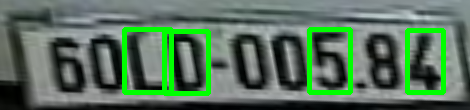

Bien so= LB54


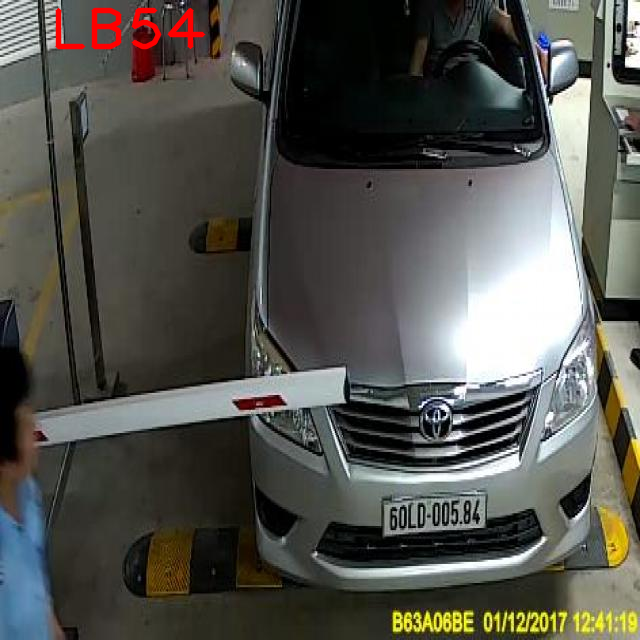

In [ ]:
# Ham sap xep contour tu trai sang phai
def sort_contours(cnts):

    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

# Dinh nghia cac ky tu tren bien so
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Ham fine tune bien so, loai bo cac ki tu khong hop ly
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

# Đường dẫn ảnh, các bạn đổi tên file tại đây để thử nhé
# path = "/content/drive/MyDrive/CS231_Project/CS231/CS231-2/test/images/"
# img_path = os.path.join(path, "AQUA4_19185_checkin_2020-10-28-12-583ReYE7alsM_jpg.rf.9be7cc29edcaaede9becf6edfab0606c.jpg")
# img_path = '/content/drive/MyDrive/CS231_Project/CS231/CS231-2/test/images/60LD00584.jpg'
img_path = '/content/drive/MyDrive/CS231_Project/images/test.jpg'
# Load model LP detection
wpod_net_path = "wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Đọc file ảnh đầu vào
Ivehicle = cv2.imread(img_path)

# Kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Lấy tỷ lệ giữa W và H của ảnh và tìm ra chiều nhỏ nhất
ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)

_ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)


# Cau hinh tham so cho model SVM
digit_w = 30 # Kich thuoc ki tu
digit_h = 60 # Kich thuoc ki tu

model_svm = cv2.ml.SVM_load('svm.xml')
model_knn = cv2.ml.KNearest.load("knn_1.xml")

if (len(LpImg)):
    # Chuyen doi anh bien so
    LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    roi = LpImg[0]
    image = LpImg[0].copy()
    # Chuyen anh bien so ve gray
    gray = cv2.cvtColor( LpImg[0], cv2.COLOR_BGR2GRAY)
    # Ap dung blur cho anh
    blur = cv2.medianBlur(gray, 3)
    # Ap dung threshold de phan tach so va nen
    binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 2)
    # Segment kí tự
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.dilate(binary, kernel3, iterations = 1)
    cont, _  = cv2.findContours(thre_mor, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    plate_info = ""

    for c in sort_contours(cont):
        (x, y, w, h) = cv2.boundingRect(c)
        ratio = h/w
        if 1<=ratio<=3.5: # Chon cac contour dam bao ve ratio w/h
            if h/roi.shape[0]>=0.55: # Chon cac contour cao tu 55% bien so tro len

                # Ve khung chu nhat quanh so
                cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 3)

                # Tach so va predict
                curr_num = thre_mor[y:y+h,x:x+w]
                curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                _, curr_num = cv2.threshold(curr_num, 30, 255, cv2.THRESH_BINARY)
                curr_num = np.array(curr_num,dtype=np.float32)
                curr_num = curr_num.reshape(-1, digit_w * digit_h)

                # Dua vao model SVM
                result = model_svm.predict(curr_num)[1]
                result = int(result[0, 0])

                # # Dua vao model KNN
                # result = model_knn.findNearest(curr_num, k=37)[1]
                # result = int(result[0, 0])

                if result<=9: # Neu la so thi hien thi luon
                    result = str(result)
                else: #Neu la chu thi chuyen bang ASCII
                    result = chr(result)

                plate_info +=result
    cv2_imshow(roi)

    # Viet bien so len anh
    cv2.putText(Ivehicle,fine_tune(plate_info),(50, 50), cv2.FONT_HERSHEY_PLAIN, 4.0, (0, 0, 255), 4, lineType=cv2.LINE_AA)

    # Hien thi anh
    print("Bien so=", plate_info)
    cv2_imshow(Ivehicle)

1/1 [==============================] - 1s 1s/step
(32, 57, 8)
Bien so= 51060989


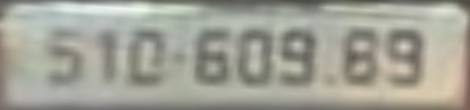

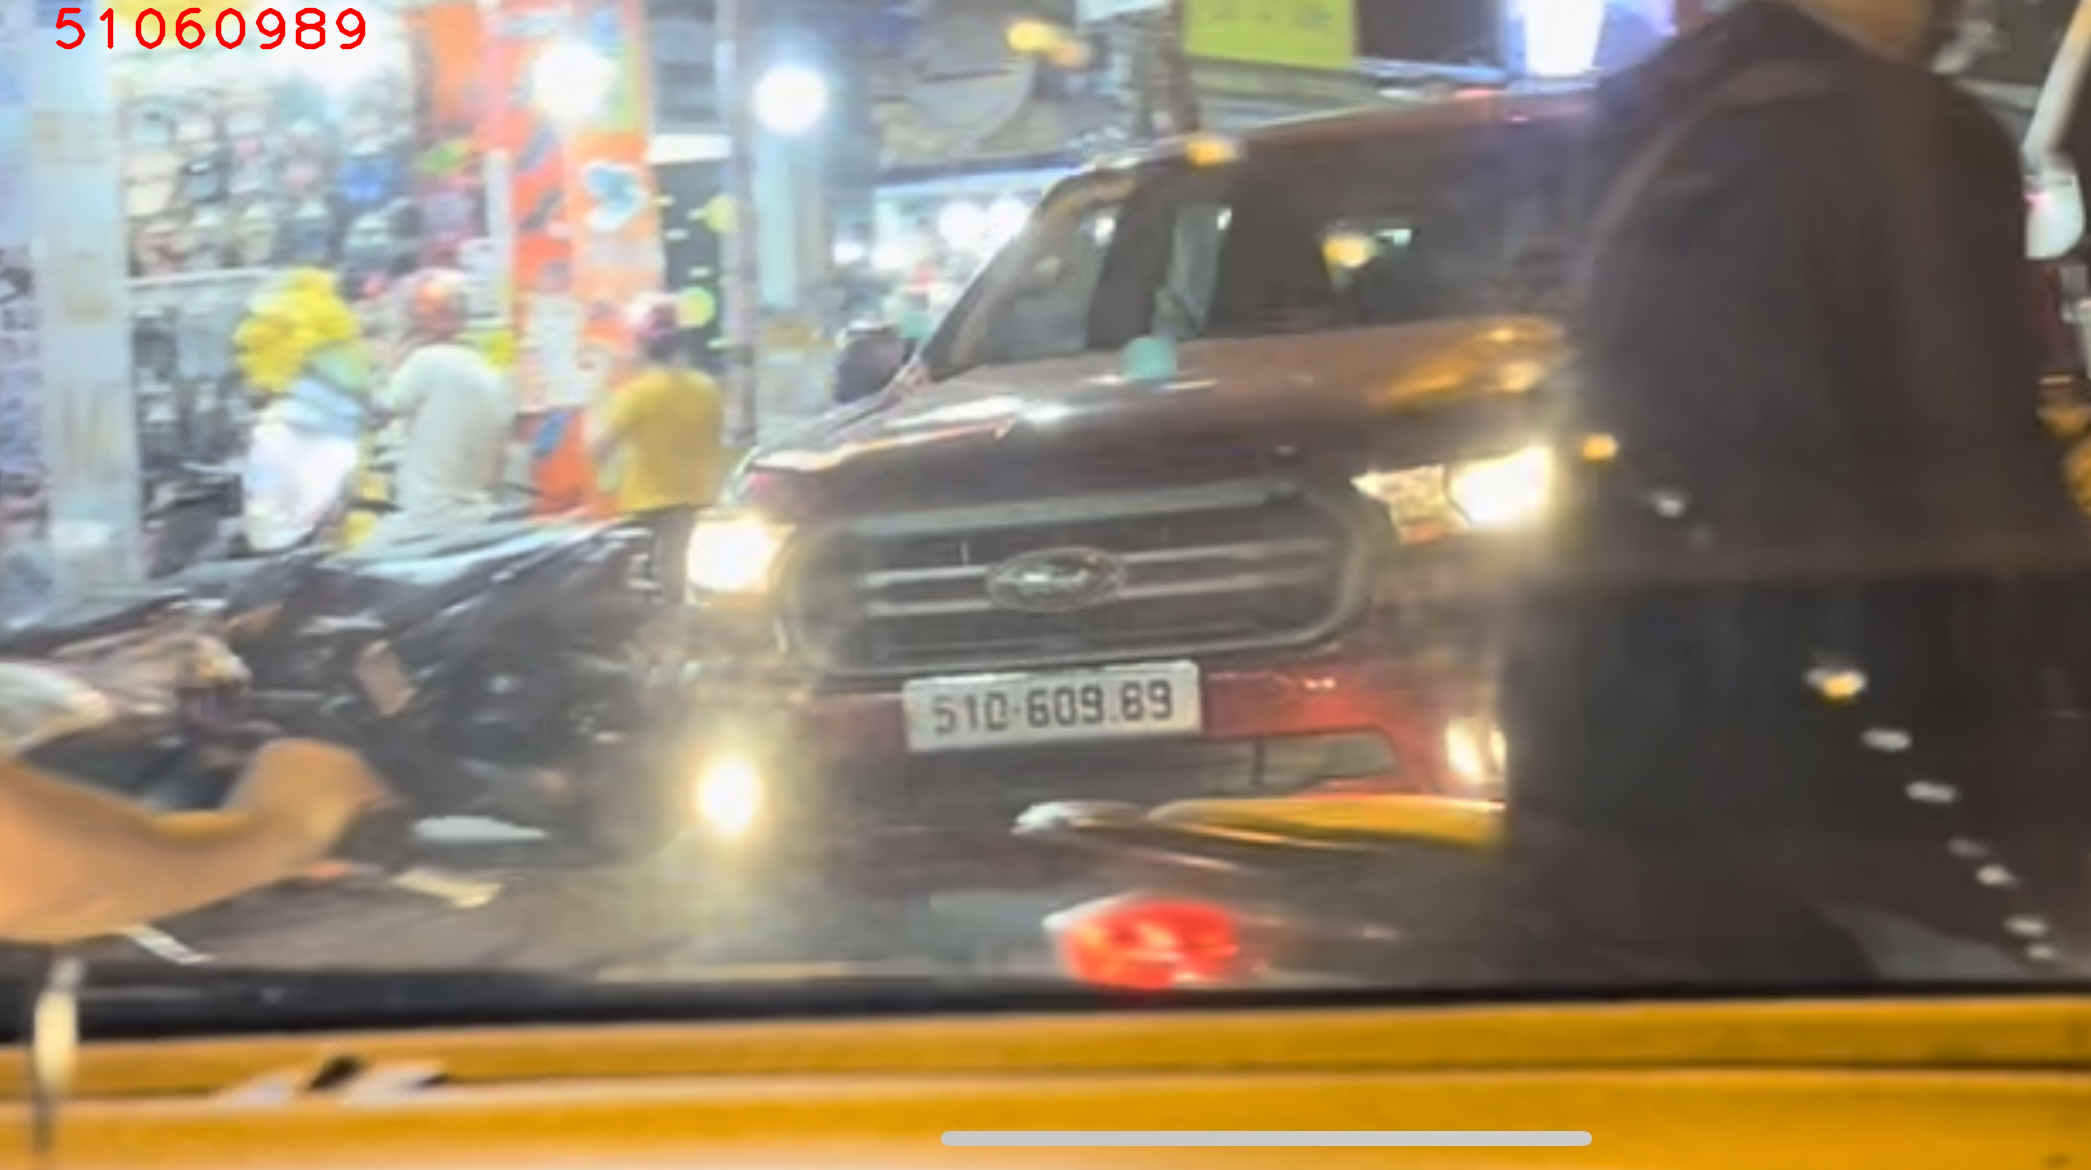

In [ ]:
# Dinh nghia cac ky tu tren bien so
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Ham fine tune bien so, loai bo cac ki tu khong hop ly
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

# Đường dẫn ảnh, các bạn đổi tên file tại đây để thử nhé
# path = "/content/drive/MyDrive/CS231_Project/CS231/CS231-2/test/images/"
# img_path = os.path.join(path, "AQUA4_19185_checkin_2020-10-28-12-583ReYE7alsM_jpg.rf.9be7cc29edcaaede9becf6edfab0606c.jpg")
# img_path = '/content/drive/MyDrive/CS231_Project/CS231/CS231-2/test/images/30E47662.jpg'
img_path = '/content/drive/MyDrive/CS231_Project/images/IMG_6333.PNG'
# Load model LP detection
wpod_net_path = "wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Đọc file ảnh đầu vào
Ivehicle = cv2.imread(img_path)

# Kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Lấy tỷ lệ giữa W và H của ảnh và tìm ra chiều nhỏ nhất
ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)

_ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)

if (len(LpImg)):
    # Chuyen doi anh bien so
    LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    gray = cv2.cvtColor(LpImg[0], cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    cropped_img = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2)

    plate_info = fine_tune(pytesseract.image_to_string(cropped_img, lang="eng", config="--psm 7"))
    # Viet bien so len anh
    cv2.putText(Ivehicle,fine_tune(plate_info),(50, 50), cv2.FONT_HERSHEY_PLAIN, 4.0, (0, 0, 255), 4, lineType=cv2.LINE_AA)

    # Hien thi anh
    print("Bien so=", plate_info)
    cv2_imshow(LpImg[0])
    cv2_imshow(Ivehicle)
    cv2.imwrite("output.png", Ivehicle)

# Loop to calculate accuracy

In [ ]:
def compare(predicted, ground_truth):
    m = len(ground_truth)
    n = len(predicted)

    if m == 0:
        return 0  # Nếu không có kí tự trong ground_truth, trả về độ chính xác là 0

    excess_chars = max(n - m, 0)  # Số kí tự thừa là max(n - m, 0)

    # Tạo ma trận độ dài LCS
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Tính toán độ dài LCS
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if ground_truth[i - 1] == predicted[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    lcs_length = dp[m][n]

    accuracy = (lcs_length / m) * 100
    return accuracy

In [ ]:
# Ham sap xep contour tu trai sang phai
def sort_contours(cnts):
    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

# Dinh nghia cac ky tu tren bien so
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Ham fine tune bien so, loai bo cac ki tu khong hop ly
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

# Load model LP detection
wpod_net_path = "wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Load model SVM
model_svm = cv2.ml.SVM_load('svm.xml')
model_knn = cv2.ml.KNearest.load("knn_1.xml")
# Cau hinh tham so cho model SVM
digit_w = 30 # Kich thuoc ki tu
digit_h = 60 # Kich thuoc ki tu

# Kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Đường dẫn ảnh, các bạn đổi tên file tại đây để thử nhé
path = "/content/drive/MyDrive/CS231_Project/CS231/CS231-2/test/images/"

# Khởi tạo biến accuracy
accuracy_svm = 0
accuracy_knn = 0
accuracy_ocr = 0

# Begin loop
for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(path, filename)
        Ivehicle = cv2.imread(img_path)
        ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
        side = int(ratio * Dmin)
        bound_dim = min(side, Dmax)
        _ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)
        if (len(LpImg)):
            LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
            roi = LpImg[0]
            gray = cv2.cvtColor( LpImg[0], cv2.COLOR_BGR2GRAY)
            blur = cv2.medianBlur(gray, 3)
            binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 2)

            cropped_img = cv2.adaptiveThreshold(blur.copy(), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2)
            predict_ocr = pytesseract.image_to_string(cropped_img, lang="eng", config="--psm 7")
            predict_ocr = fine_tune(predict_ocr)

            # Segment kí tự
            kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
            thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
            thre_mor = cv2.morphologyEx(thre_mor, cv2.MORPH_OPEN, kernel3)
            thre_mor = cv2.morphologyEx(thre_mor, cv2.MORPH_CLOSE, kernel3)
            cont, _  = cv2.findContours(thre_mor, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            predict_svm = ''
            predict_knn = ''
            for c in sort_contours(cont):
                (x, y, w, h) = cv2.boundingRect(c)
                ratio = h/w
                if 1<=ratio<=3.5: # Chon cac contour dam bao ve ratio w/h
                    if h/roi.shape[0]>=0.55: # Chon cac contour cao tu 55% bien so tro len
                        # Ve khung chu nhat quanh so
                        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        # Tach so va predict
                        curr_num = thre_mor[y:y+h,x:x+w]
                        curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                        _, curr_num = cv2.threshold(curr_num, 30, 255, cv2.THRESH_BINARY)
                        curr_num = np.array(curr_num,dtype=np.float32)
                        curr_num = curr_num.reshape(-1, digit_w * digit_h)

                        # Dua vao model SVM
                        result_svm = model_svm.predict(curr_num)[1]
                        result_svm = int(result_svm[0, 0])
                        # Dua vao model KNN
                        result_knn = model_knn.findNearest(curr_num, k=1)[1]
                        result_knn = int(result_knn[0, 0])

                        if result_svm <= 9: # Neu la so thi hien thi luon
                            result_svm = str(result_svm)
                        else: #Neu la chu thi chuyen bang ASCII
                            result_svm = chr(result_svm)

                        if result_knn <= 9: # Neu la so thi hien thi luon
                            result_knn = str(result_knn)
                        else: #Neu la chu thi chuyen bang ASCII
                            result_knn = chr(result_knn)

                        predict_svm += result_svm
                        predict_knn += result_knn
            label = os.path.splitext(filename)[0].replace(' (1)', '').replace(' (2)', '')
            acc_svm = compare(predict_svm, label)
            acc_knn = compare(predict_knn, label)
            acc_ocr = compare(predict_ocr, label)
            accuracy_svm += acc_svm
            accuracy_knn += acc_knn
            accuracy_ocr += acc_ocr
            # cv2_imshow(roi)
            print('Predict of svm: ', predict_svm)
            print('Predict of knn: ', predict_knn)
            print('Predict of ocr: ', predict_ocr)
            print('Label: ', label)
            print('Accuracy of svm: ', acc_svm)
            print('Accuracy of knn: ', acc_knn)
            print('Accuracy of ocr: ', acc_ocr)
            print('\n')
accuracy_svm = accuracy_svm / 129
accuracy_knn = accuracy_knn / 129
accuracy_ocr = accuracy_ocr / 129
print('Accuracy of svm: ', accuracy_svm)
print('Accuracy of knn: ', accuracy_knn)
print('Accuracy of ocr: ', accuracy_ocr)

1/1 [==============================] - 1s 608ms/step
(18, 18, 8)
Predict of svm:  51E88270
Predict of knn:  51E88270
Predict of ocr:  51F88270
Label:  51F88270
Accuracy of svm:  87.5
Accuracy of knn:  87.5
Accuracy of ocr:  100.0


1/1 [==============================] - 0s 170ms/step
(18, 18, 8)
Predict of svm:  61047281
Predict of knn:  51047281
Predict of ocr:  51G647281
Label:  51G47281
Accuracy of svm:  75.0
Accuracy of knn:  87.5
Accuracy of ocr:  100.0


1/1 [==============================] - 0s 147ms/step
(18, 18, 8)
Predict of svm:  51615
Predict of knn:  51B16
Predict of ocr:  511555
Label:  51F15585
Accuracy of svm:  50.0
Accuracy of knn:  37.5
Accuracy of ocr:  75.0


1/1 [==============================] - 0s 163ms/step
(18, 18, 8)
Predict of svm:  54
Predict of knn:  54
Predict of ocr:  BLD00584
Label:  60LD00584
Accuracy of svm:  22.22222222222222
Accuracy of knn:  22.22222222222222
Accuracy of ocr:  77.77777777777779


1/1 [==============================] - 0s 156ms/step
